## Alumno : Rubén Álvarez Mosquera

---
# **Clasificación Multiclase de la calidad de los vinos**

*Prefacio : Nuestra tarea consiste en clasificar la calidad de los vinos propuestos*

Tenemos delante de nosotros un dataset de vinos blancos y tintos portugueses del tipo "Vinho Verde".

---

## Declaración de módulos
---

En primer lugar, vamos a importar algunos módulos comunes. 

También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

También agregaremos una librería (warnings) para evitar los molestos mensajes de advertencia(Futurewarnings).

In [1]:
# Se requiere Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)

# Se requiere Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Otros imports
import numpy as np
import os

# Importamos la librería Pandas para administar Dataframes
import pandas as pd

# la línea que sigue, sólo en Colab ...
# %matplotlib inline
# Importamos librería MatPlotLib
import matplotlib as mpl
import matplotlib.pyplot as plt


# Importamos librería "Seaborn" para la visualización que es como un MatPlotLib con "esteriodes"
import seaborn as sns 


# Importa la librería que va a posibilitar evitar que salgan los molestos mensajes de advertencia
import warnings

Configuración de las Advertencias "Futurewarning"

In [2]:
# configuración para eviatar que aparezcan las advertencias "FutureWarnings"
warnings.filterwarnings("ignore", category=FutureWarning)

Configuración de las visualizaciones de "Seaborn"

In [3]:
# tamaño del texto en las etiquetas por defecto para Matplotlib
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)


# Configuramos visualizaciones con Seaborn
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## Importacion de Datos
---

Definimos la función que importará los datos de un archivo CSV a un Dataframe de Pandas

In [5]:
WINE_PATH = os.path.join("dataset");

def load_wine_data(wine_path):
    csv_path = os.path.join(wine_path, "winequality-red.csv")
    return pd.read_csv(csv_path)

Llamamos a la función de importación de datos y los importamos a la variable "insurance"

In [6]:
wine = load_wine_data(WINE_PATH)

Comprobamos el estado de los Datos, mediante una revisión de las primeras filas

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Realizamos una copia de backup

In [10]:
wine_backup = wine.copy()

## Revisamos el estado de los datos
---

#### Revisamos las columnas en general

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Podemos ver que todas las variables son Cuantitativas Contínuas, excepto "Quality" que es Discreta

#### Comprobación del número de NaN por categoría

In [12]:
# De forma global
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Vemos que no hay ningún NaN que revisar

### CONCLUSIÓN : ------------------------------------------
- No vemos que sobre ninguna columna de datos.
- Tampoco vemos NaN dentro de los valores.
- Finalmente no existen columnas categoricas en las que tengamos que actuar.

---
---
---

## Estudio numérico de la correlación entre los datos para obtener información relevante
---

### Revisión de los histogramas de las columnas
---

Realizamos una visualización de los histogramas de los datos, que representan el número de veces que un valor aparece, representando la distribución de los casos por categoría para tener una idea de su cantidad, dispersión ,etc...

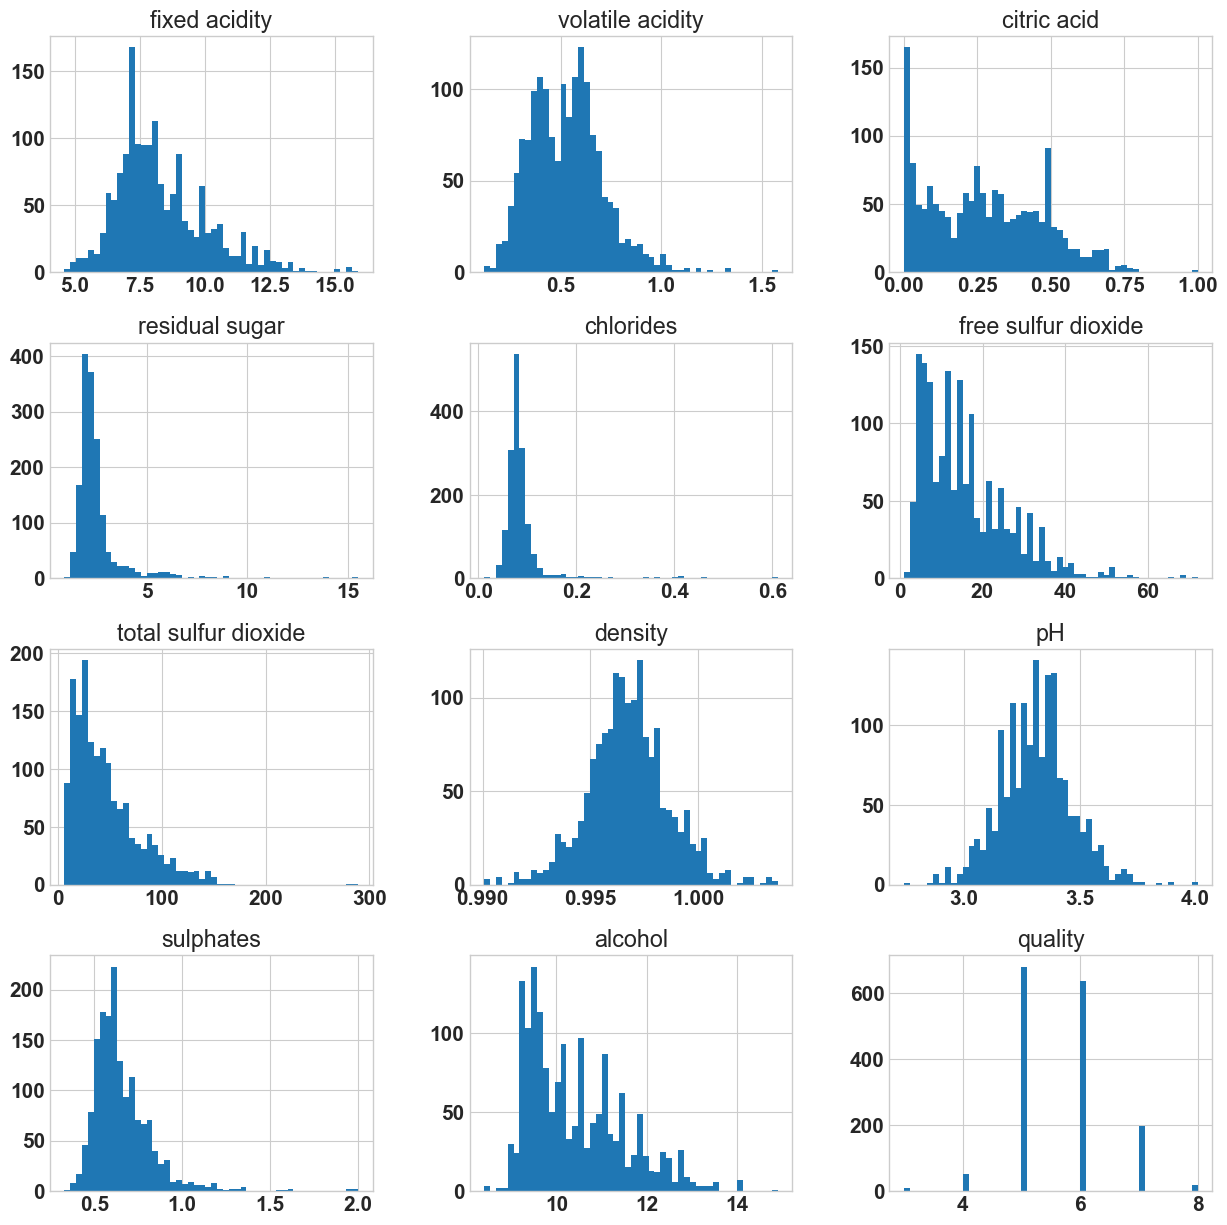

In [13]:
wine.hist(bins=50, figsize =(15,15))
plt.show()

Los histogramas tienen un buen comportamiento con valores continuos y discretos. En este caso podemos ver las variables se distribuyen sobra la normal, y en ciertos casos desplazada hacia los valores bajos, con una mayor o menos distribución.

Pasaremos a revisar unos gráficos que nos pueden arrojen algo de luz sobre los datos, para poder sacar alguna conclusión valiosa para este estudio.

---
---
---

# Buscando correlaciones

Aquí nos damos cuenta de la necesidad de la normalización del modelo para que las correlaciones puedan ser medidas

In [20]:
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [21]:
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

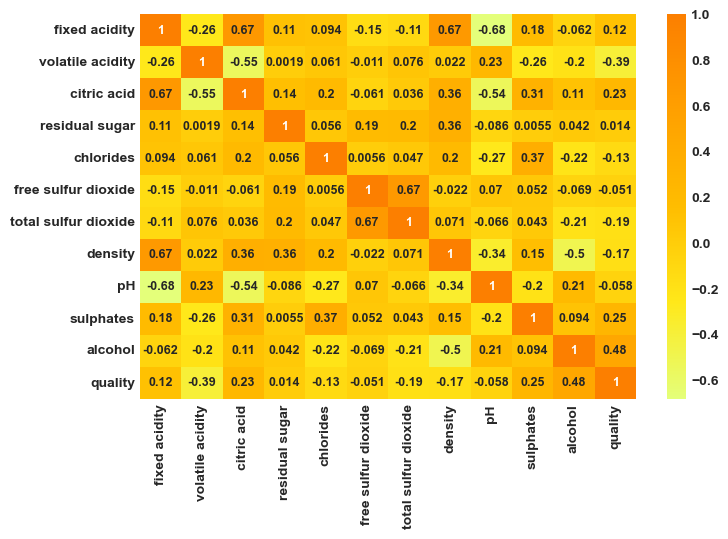

In [26]:
plt.rcParams['font.size'] =9
mpl.rc('axes',  labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
corr = wine.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

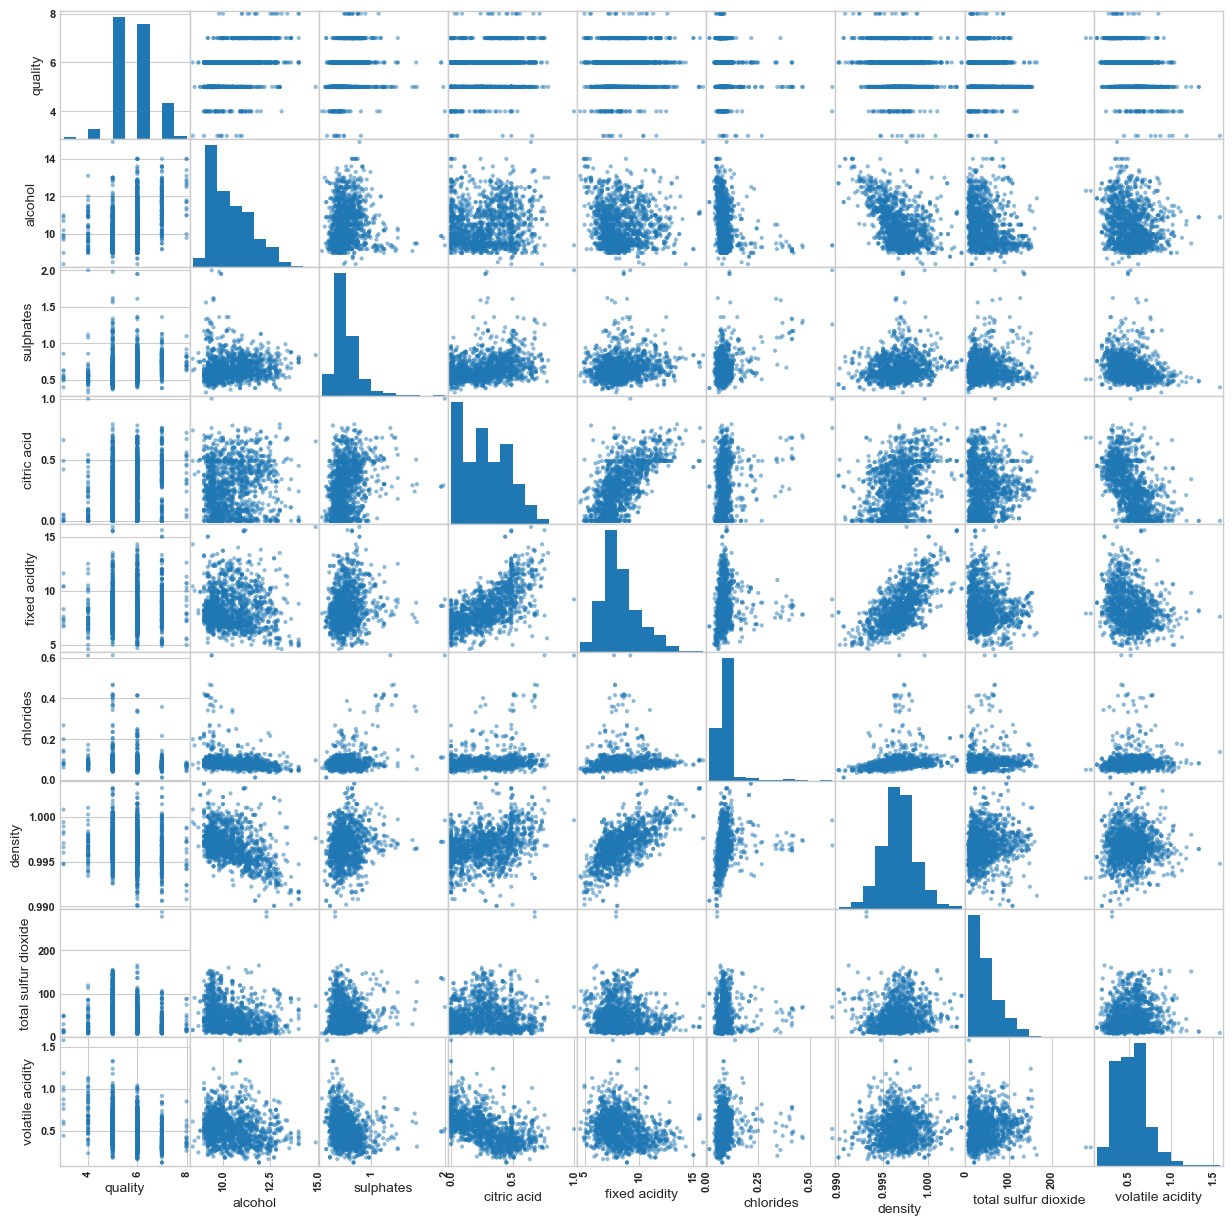

In [35]:
from pandas.plotting import scatter_matrix;

attributes = ["quality", "alcohol", "sulphates", "citric acid", 
                "fixed acidity","chlorides", "density", 
                "total sulfur dioxide", "volatile acidity"]


scatter_matrix(wine[attributes], figsize=(15,15) );

## Conclusiones preliminares:
- Podemos observar una correlación directa entre :
   - 0.48 entre Calidad y Alcohol
   - 0.25 entre Calidad y Sulfatos
   - 0.23 entre Calidad y Ácido Cítrico
- Podemos observar una correlación inversa entre :
   - -0.39 entre Calidad y Acidez Volátil

## Análisis por calidades
---
---

### Porcentaje de calidades por  total de vinos 
---

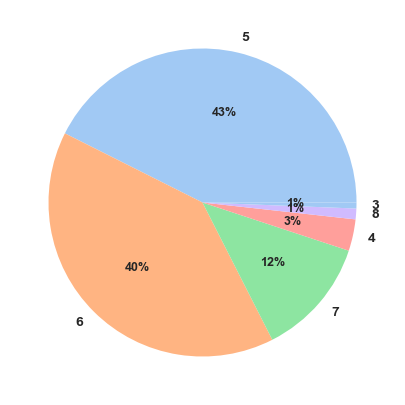

In [27]:
data = list(wine['quality'].value_counts())
labels = ['5', '6','7','4','8','3']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

### Alcohol por calidades 
---

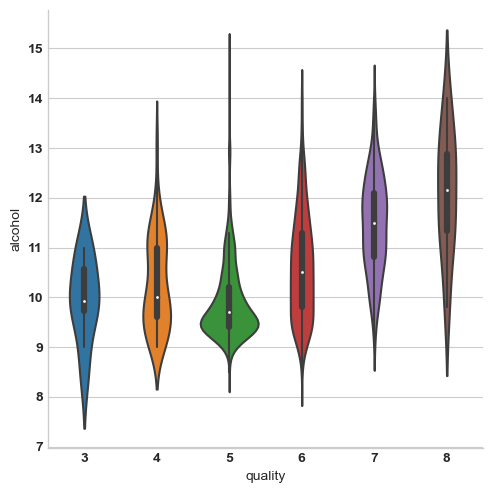

In [28]:
sns.catplot(
    data=wine, x="quality", y="alcohol",
    kind="violin", split=True,
)

### Sulfatos por calidades 
---

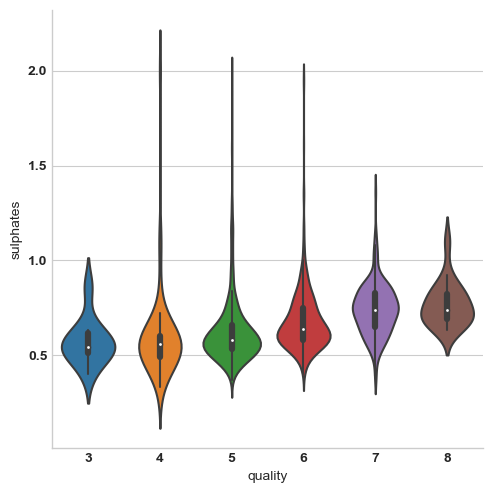

In [32]:

sns.catplot(data=wine, x="quality", y="sulphates", kind="violin", split=True,)

### Ácido Cítrico por calidades 
---

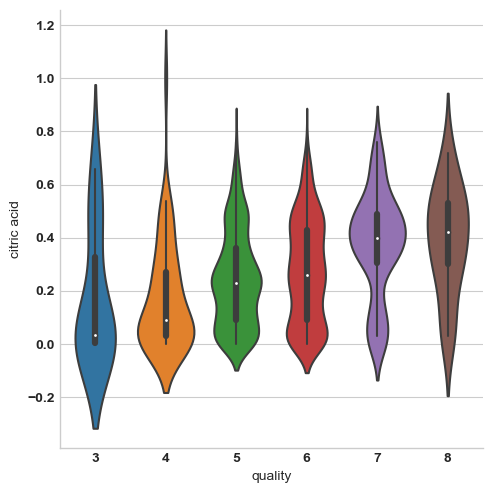

In [33]:
sns.catplot(data=wine, x="quality", y="citric acid", kind="violin", split=True,)

### "volatile acidity"" por calidades 
---

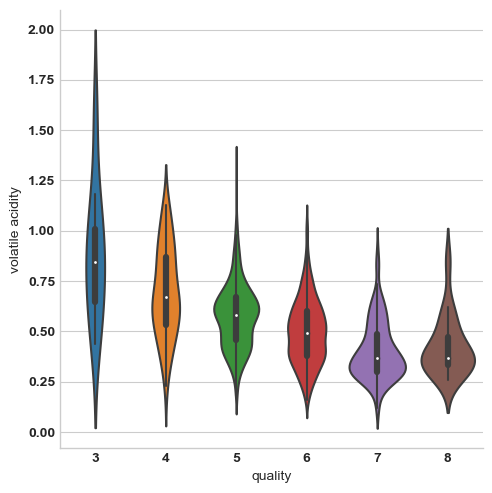

In [34]:
sns.catplot(data=wine, x="quality", y="volatile acidity", kind="violin", split=True,)

Podemos observar una correclación negativa respesto a la calidad

---
---
---

# Entrenando modelos de Clasificación
---

Revisamos el Datasets antes de usarlos en los entrenamientos del modelo


In [37]:
wine.info()
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 
---

## Creación del Train y Test Set
---

Primeramente generaremos una semilla de aletoriedad, que normalmente se usa el valor 42, que usaremos para barajar los índices del Dataset a la hora de realizar la división del Dataset de Entrenamiento del de Test

In [38]:
# plantamos una semilla
np.random.seed(42)

Necesitamos crear, del total de datos del Dataset, una subdivisión. Una parte será para entrenar al modelo (TrainSet) y otro para comprobar el resultado del entrenamiento (TestSet)

Creamos una función para este trabajo llamada "split_train_test", para separ dichos Set

Aquí podemos ver la función np.random.permutation, a la que hemos previamente configurado con la semilla "42", para que baraje de forma "aleatoria" los índices, tanto del dataset de entrenamiento, como el de Test

In [39]:
def split_train_test(data, test_ratio):
    test_set_size  =int(len(wine)*test_ratio)
    shuffle_indices=np.random.permutation(len(data))
    test_indices   =shuffle_indices[:test_set_size]
    train_indices  =shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Aplicaremos normalmente una división 80/20. Otros ratios pueden ser 70:30, 60:40, e incluso 50:50, pero en este caso usaremos el primero, ya que es el más común.

In [41]:
# Agreagamos el ratio de split
ratio = 0.2
# Ejecutamos la función
X_train, X_test = split_train_test(wine, ratio)
# Revisamos el número de filas en cada Set
print('Número de filas Total del dataset : ',len(wine))
print('Ratio : ', 100-100*ratio, '/',ratio*100) 
print('Número de filas por dataset :')
print('TrainSet : ',len(X_train))
print('TestSet  : ', len(X_test))


Número de filas Total del dataset :  1599
Ratio :  80.0 / 20.0
Número de filas por dataset :
TrainSet :  1280
TestSet  :  319


Una vez que tenemos el Dataset de entrenamiento (X_train), creamos una copia con la columna de resultados, que llamaremos "y_train" y eliminaremos dicha columna del Dataset de entrenameiento (X_train)

In [42]:
# Creamos un nuevo Dataset con la columna Charges a predecir con el modelo
y_train = X_train["quality"].copy()
# Eliminamos dicha columna para el modelo de entrenamiento
X_train = X_train.drop("quality", axis=1)

In [43]:
y_train

1384    5
1566    6
1396    5
1470    5
528     6
       ..
1478    3
413     7
466     6
1349    5
1007    7
Name: quality, Length: 1280, dtype: int64

---
---
---

## Entrenando y evaluando :
---

# Clasificación multiclase

In [56]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [57]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [48]:
from sklearn.svm import SVC;

svm_clf = SVC(gamma="auto", random_state=42);
svm_clf.fit(X_train[:1000], y_train[:1000]);
svm_clf.predict(X_train)


array([5, 6, 6, ..., 6, 6, 6], dtype=int64)

In [68]:
# ???????????????????????????????????????????
# Es necesario en este caso ???????
# some_digit = X_train[1]; 

In [49]:
some_digit_scores = svm_clf.decision_function(X_train)
some_digit_scores


array([[-0.27178674,  1.8143606 ,  5.27768839,  4.24815407,  3.12936641,
         0.75290943],
       [-0.27001934,  1.80627312,  4.2469572 ,  5.27937021,  3.12080334,
         0.75100949],
       [-0.27666436,  1.81658685,  4.27542416,  5.27406545,  2.92483255,
         0.75034217],
       ...,
       [-0.26961912,  1.78994447,  4.23823359,  5.27511721,  3.21518371,
         0.74764067],
       [-0.27244787,  1.80302936,  4.22558893,  5.28033424,  3.20131366,
         0.75023374],
       [-0.27517127,  1.89804023,  3.21352969,  5.27626428,  4.21814236,
         0.74338021]])

In [50]:
np.argmax(some_digit_scores)

1166

In [51]:
svm_clf.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [52]:
svm_clf.classes_[5]

8

In [53]:
from sklearn.multiclass import OneVsRestClassifier;

ovr_clf = OneVsRestClassifier( SVC(gamma="auto", random_state=42) );
ovr_clf.fit(X_train[:1000], y_train[:1000]);
ovr_clf.predict(X_train)

array([5, 6, 5, ..., 6, 6, 6], dtype=int64)

In [54]:
len(ovr_clf.estimators_)

6

In [58]:
sgd_clf.fit(X_train, y_train);
sgd_clf.predict(X_train)

array([5, 5, 5, ..., 5, 5, 6], dtype=int64)

In [59]:
sgd_clf.decision_function(X_train)

array([[ -655.30815003,  -485.26367053,   304.17674264,  -543.98904245,
         -489.21311899, -1053.65292227],
       [ -458.11064481,  -403.97022472,   -86.51076544,  -148.68516632,
         -236.49104148,  -635.09054923],
       [ -100.12330496,   -10.07744978,   119.03390672,   -63.55161974,
         -196.05827022,  -223.55876129],
       ...,
       [ -440.30848812,  -377.63976969,   -56.80480542,  -165.38933904,
         -214.85080774,  -658.33986417],
       [ -348.85155089,  -288.64720015,    34.27598411,  -130.82749695,
         -308.67743832,  -540.30260543],
       [ -249.17835853,  -187.85451306,  -145.4447958 ,   -26.92587823,
          -72.29137191,  -339.19607787]])

**Warning**: las dos celdas siguientes pueden tardar en ejecutarse más de 30 minutos, dependiendo del hardware que uses.

In [60]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.470726  , 0.40046838, 0.40375587])

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.56440281, 0.57377049, 0.54694836])

# Error Analysis

In [62]:
from sklearn.model_selection import cross_val_predict;
from sklearn.metrics import confusion_matrix;


In [63]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx 


array([[  0,   0,   4,   6,   0,   0],
       [  0,   0,  15,  28,   0,   0],
       [  0,   2, 181, 360,   1,   0],
       [  3,   0, 152, 343,  18,   0],
       [  0,   0,  30, 100,  20,   0],
       [  0,   0,   3,  11,   3,   0]], dtype=int64)

In [64]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8));
    ax = fig.add_subplot(111);
    cax = ax.matshow(matrix);
    fig.colorbar(cax);

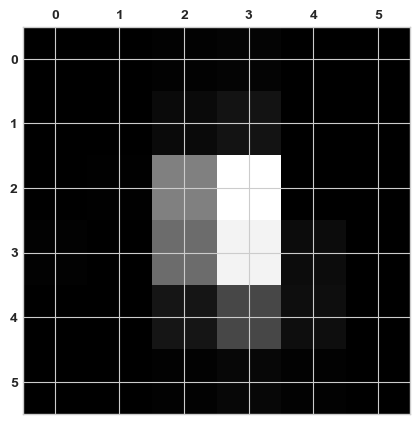

In [65]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


In [66]:
row_sum = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sum
norm_conf_mx


array([[0.        , 0.        , 0.4       , 0.6       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.34883721, 0.65116279, 0.        ,
        0.        ],
       [0.        , 0.00367647, 0.33272059, 0.66176471, 0.00183824,
        0.        ],
       [0.00581395, 0.        , 0.29457364, 0.66472868, 0.03488372,
        0.        ],
       [0.        , 0.        , 0.2       , 0.66666667, 0.13333333,
        0.        ],
       [0.        , 0.        , 0.17647059, 0.64705882, 0.17647059,
        0.        ]])

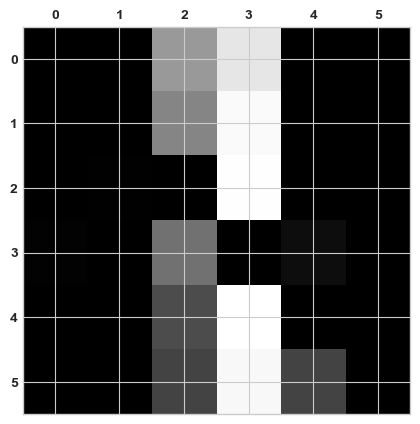

In [67]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

---
---
---

---
---
---

---
---
---

## SGD Classifier

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [45]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [46]:
y_test = X_test["quality"].copy()
X_test = X_test.drop("quality", axis=1)

In [47]:

sgd_predictions = sgd_clf.predict(X_test)

## K-fold Cross-Validation

In [87]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.99107143, 1.        , 0.62162162])

## Dummy Classifier

Como no nos podemos fiar de los resultados anteriores, realizaremos una prueba con un ·Dummy Clasifier" el cual predecirá que NADIE sobrevive. 

In [88]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

print(any(dummy_clf.predict(X_train)))


False


Este Falso nos quiere decir que no se ha detectado ningús superviviente (como es de esperar en el caso de los Dummy Clasifiers)

In [89]:
cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.64285714, 0.64285714, 0.64864865])

Estos resultados de aproximadamente el 64% es porque, el 64% de las personas No sobrevivieron, por lo tanto si (como en este caso con el Dummy Classifier) decimos que NINGUNA persona ha sobrevivido, acertaremos en el 64% de las ocasiones.

## Matrices de Confusión

Una mejor forma de acercarnos a unas métricas de rendimiento de los modelos, son las matrices de confusión, las cuales nos aportarán las métricas de la Precisión y la Sensibilidad (Precision/Recall)

In [90]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm


array([[191,  25],
       [ 18, 101]], dtype=int64)

### Esto significa que :
  - (TN) True Negative = 184
  - (FP) False Positive=  32   >>> Errores de Tipo I
  - (FN) False Negative =  0   >>> Errored de Tipo II
  - (TP) True Positive = 119

### Precisión / Precision:
$$ precision = \frac{TP}{TP + FP} $$

Precisión del modelo

In [93]:
precision = cm[1][1]/(cm[1][1]+cm[0][1])
precision

0.8015873015873016

### Sensibilidad / Recall:
$$ sensibilidad = \frac{TN}{TN + FN} $$

Sensibilidad del modelo

In [94]:
recall = cm[0][0]/(cm[0][0]+cm[1][0])
recall

0.9138755980861244

### Funciones "Precision" & "Recall" para realizar el mismo trabajo desde una librería

In [95]:
from sklearn.metrics import precision_score, recall_score

In [96]:
precision_score(y_train, y_train_pred)

0.8015873015873016

In [97]:
recall_score(y_train, y_train_pred)

0.8487394957983193

## F1 Score

In [98]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)


0.8244897959183675

La metrica F1 Score beneficia a los clasificadores que tienen un valor parecedo para "Precision" y "Recall"

## Precision VS Recall ( Precisión VS Sensibilidad )

Hay que tener en cuenta que ámbas métricas se relacionan de tal modo que no se pueden tener al mismo tiempo, y que , si aumentas la sensibilidad reducirás la precisión y viceversa

Como la librería Scikit-learn no nos deja ver los límites(theshold) directamente, podemos saberlo a través del método "decision_function()" en vez de "predict()"

#### Con el siguiente ejemplo , podemos ver que ocurre cuando el límite lo ponemos a 0 o a 3000

In [99]:
y_scores = sgd_clf.decision_function(X_test)
y_scores



array([ -858.11101459,   618.89355552,  -798.23615637,  -950.51566406,
         510.05054766,  -933.51362182,   464.93058905,  -902.75157475,
         448.91413313,  -964.70616385, -1073.59345185,   613.1507861 ,
         458.04059122,   682.74411819,  -964.70616385,  -933.95384859,
         461.97769589,  -806.86692776,  -991.67189134, -1020.50994233,
        -875.06793635,  -897.98947305,   358.85696372,  -952.22520195,
         560.22018017,   626.89717821,   528.48872439,  -956.69830057,
        -851.72326711,  -952.22520195,  -949.80240311,   465.08898137,
         563.79572259,  -964.70616385,   511.93309092,  -968.10052881,
         642.91064975,  -827.65425389,   439.04894822,  -703.27635996,
         642.91064975,   453.36227844,  -854.12044739,  -948.41445111,
        -836.96929779,  -990.54954186,   561.07155375,   491.22457595,
         516.89362883,  -948.06792701,  -759.60724918,   575.58075341,
         467.86761277,  -905.23164573,  -889.166364  ,   413.32985969,
      

In [100]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [101]:
y_some_digit_pred

array([False,  True, False, False,  True, False,  True, False,  True,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True, False])

Vemos disparidad de resultados con un límite/threshold = 0

In [102]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)


In [103]:
y_some_digit_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

En cambio podemos observar como todos son Flalsos cuando el límite es 3000

#### Para poder visualizar el límite/threshold usaremos la validación cruzada con el método "decision_function"

In [104]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,method="decision_function")

In [105]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [126]:
# Pongamos un límite de :
threshold = 0

### Gráfica Presicion/Recall VS Threshold

##### En esta gráfica podemos observar que cuando el threshold alcanza sus máximos respecto a Precisión y Sensibilidad

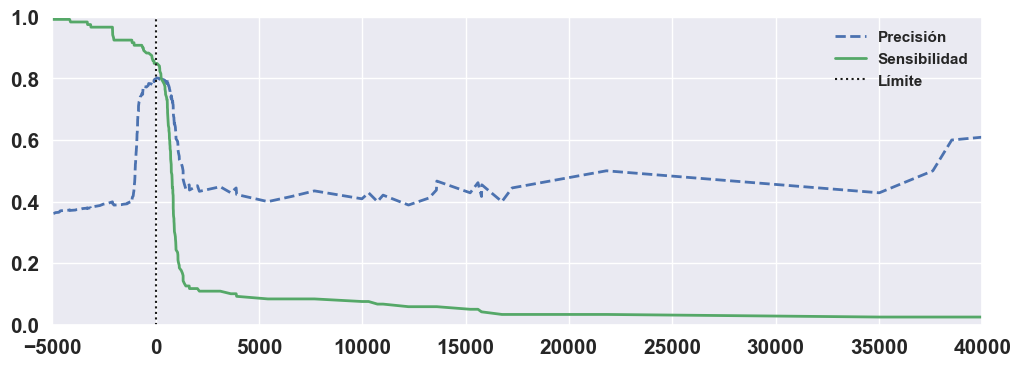

In [127]:
plt.figure(figsize=(12, 4))
plt.axis([-5000, 40000, 0, 1])
plt.plot(thresholds, precisions[:-1], "b--", label="Precisión", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Sensibilidad", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Límite")
plt.legend()
plt.show()

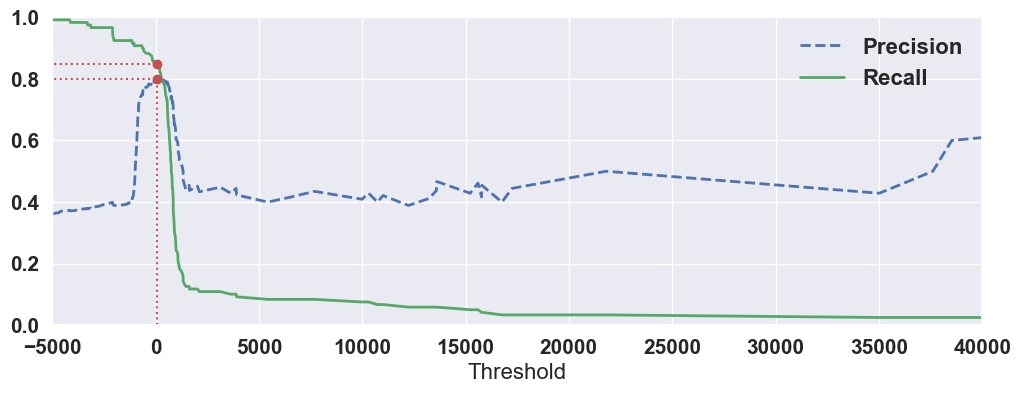

In [129]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2);
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2);
    plt.legend(loc="upper right", fontsize=16);
    plt.xlabel("Threshold", fontsize=16);
    plt.grid(True);
    plt.axis([-5000, 40000, 0, 1]);

recall_90_precision = recalls[np.argmax(precisions >= 0.80)];
threshold_90_precision = thresholds[np.argmax(precisions >= 0.80)];

plt.figure(figsize=(12, 4));
plot_precision_recall_vs_threshold(precisions, recalls, thresholds);
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.8], "r:");
plt.plot([-50000, threshold_90_precision], [0.8, 0.8], "r:");
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:");
plt.plot([threshold_90_precision], [0.8], "ro");
plt.plot([threshold_90_precision], [recall_90_precision], "ro");
plt.show();

### Precision VS Recall

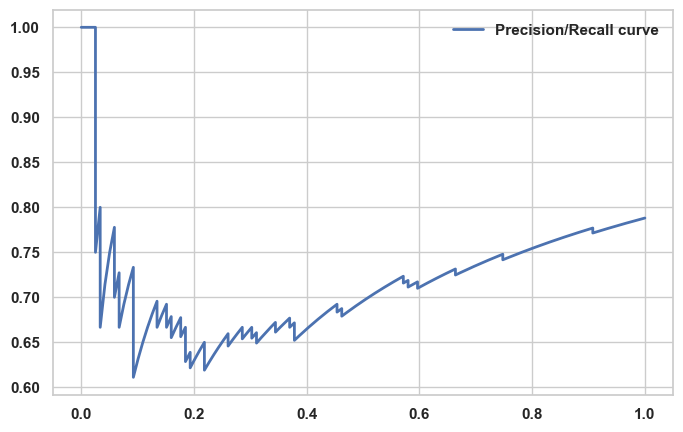

In [227]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.legend()
plt.show()


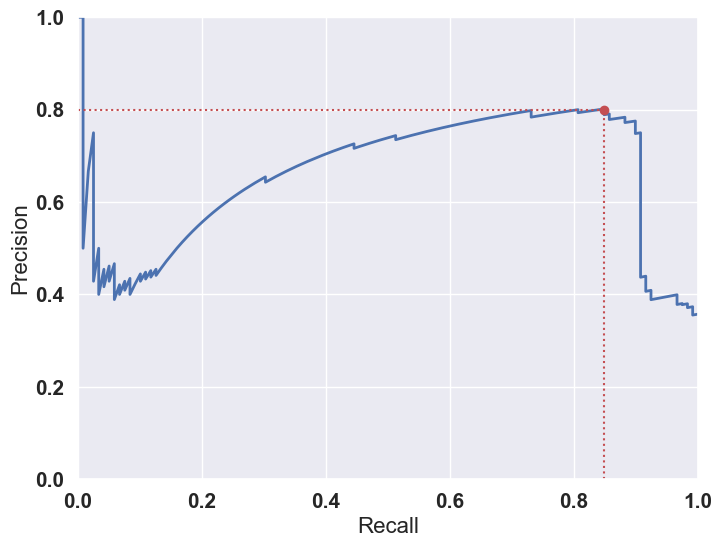

In [131]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2);
    plt.xlabel("Recall", fontsize=16);
    plt.ylabel("Precision", fontsize=16);
    plt.axis([0, 1, 0, 1]);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_precision_vs_recall(precisions, recalls);
plt.plot([recall_90_precision, recall_90_precision], [0., 0.8], "r:");
plt.plot([0.0, recall_90_precision], [0.8, 0.8], "r:");
plt.plot([recall_90_precision], [0.8], "ro");
plt.show();

---
---
---

## The ROC Curve

In [132]:
from sklearn.metrics import roc_curve;

fpr, tpr, thresholds = roc_curve(y_train, y_scores);

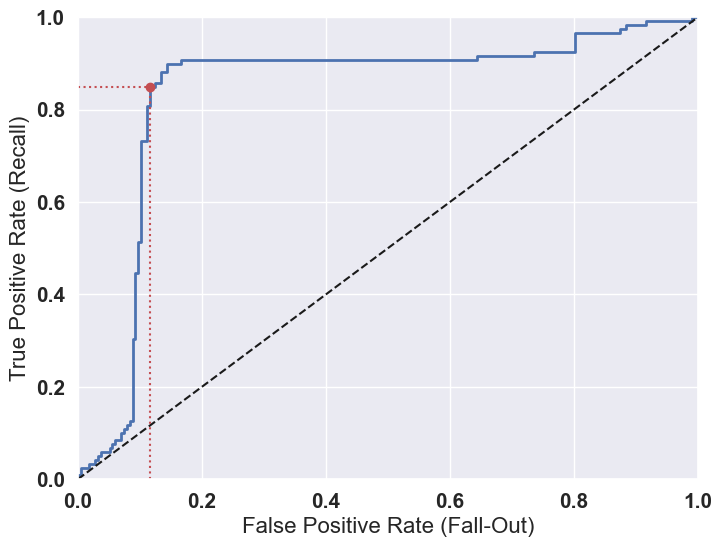

In [133]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label);
    plt.plot([0, 1], [0, 1], 'k--');
    plt.axis([0, 1, 0, 1]);
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16);
    plt.ylabel('True Positive Rate (Recall)', fontsize=16);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_roc_curve(fpr, tpr);
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)];
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.show();

In [134]:
from sklearn.metrics import roc_auc_score;

roc_auc_score(y_train, y_scores)

0.8392857142857142

In [136]:
from sklearn.ensemble import RandomForestClassifier;

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

y_probas_forest = cross_val_predict(forest_clf,X_train, y_train, cv=3,method="predict_proba");

In [138]:
y_scores_forest=y_probas_forest[:,1];

fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train, y_scores_forest);

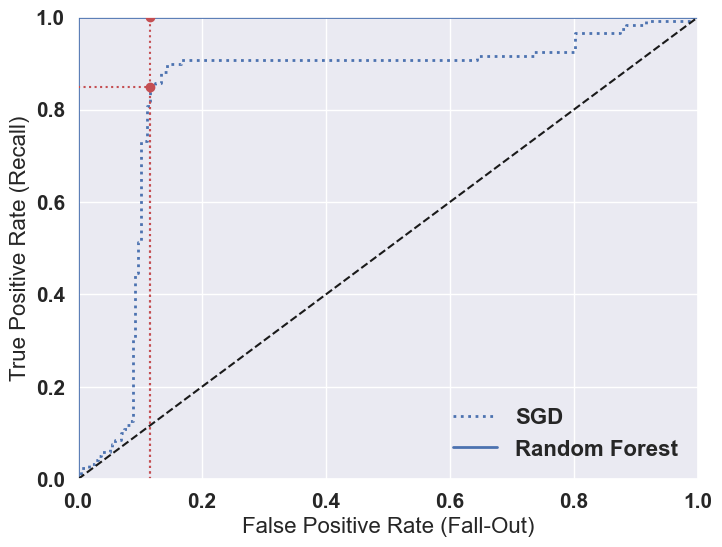

In [139]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)];

plt.figure(figsize=(8, 6));
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD");
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest");
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:");
plt.plot([fpr_90], [recall_for_forest], "ro");
plt.grid(True);
plt.legend(loc="lower right", fontsize=16);
plt.show();

In [140]:
roc_auc_score(y_train,y_scores_forest)

1.0

In [141]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train,y_train,cv=3);
precision_score(y_train,y_train_pred_forest)

1.0

In [142]:
recall_score(y_train, y_train_pred_forest)

1.0

---
---
---